# Projekt ZUM - Streszczenie tekstu

## Wstępna analiza

In [10]:
! pip install datasets

In [11]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")
df_train = ds['train'].to_pandas().loc[:1000]
df_val = ds['validation'].to_pandas()
df_test = ds['test'].to_pandas()

In [12]:
ds

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [13]:
import pandas as pd

pd.set_option('display.max_colwidth', 500)

df_train

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, ...",Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,"Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the ""forgotten floor,"" where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the mo...","Mentally ill inmates in Miami are housed on the ""forgotten floor""\nJudge Steven Leifman says most are there as a result of ""avoidable felonies""\nWhile CNN tours facility, patient shouts: ""I am the son of the president""\nLeifman says the system is unjust and he's fighting for change .",ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who were on the Minneapolis bridge when it collapsed told harrowing tales of survival. ""The whole bridge from one side of the Mississippi to the other just completely gave way, fell all the way down,"" survivor Gary Babineau told CNN. ""I probably had a 30-, 35-foot free fall. And there's cars in the water, there's cars on fire. The whole bridge is down."" He said his back was injured but he determined he could move around. ""I realized there was a school ...","NEW: ""I thought I was going to die,"" driver says .\nMan says pickup truck was folded in half; he just has cut on face .\nDriver: ""I probably had a 30-, 35-foot free fall""\nMinnesota bridge collapsed during rush hour Wednesday .",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,"WASHINGTON (CNN) -- Doctors removed five small polyps from President Bush's colon on Saturday, and ""none appeared worrisome,"" a White House spokesman said. The polyps were removed and sent to the National Naval Medical Center in Bethesda, Maryland, for routine microscopic examination, spokesman Scott Stanzel said. Results are expected in two to three days. All were small, less than a centimeter [half an inch] in diameter, he said. Bush is in good humor, Stanzel said, and will resume his acti...","Five small polyps found during procedure; ""none worrisome,"" spokesman says .\nPresident reclaims powers transferred to vice president .\nBush undergoes routine colonoscopy at Camp David .",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,"(CNN) -- The National Football League has indefinitely suspended Atlanta Falcons quarterback Michael Vick without pay, officials with the league said Friday. NFL star Michael Vick is set to appear in court Monday. A judge will have the final say on a plea deal. Earlier, Vick admitted to participating in a dogfighting ring as part of a plea agreement with federal prosecutors in Virginia. ""Your admitted conduct was not only illegal, but also cruel and reprehensible. Your team, the NFL, and NF...","NEW: NFL chief, Atlanta Falcons owner critical of Michael Vick's conduct .\nNFL suspends Falcons quarterback indefinitely without pay .\nVick admits funding dogfighting operation but says he did not gamble .\nVick due in federal court Monday; future in NFL remains uncertain .",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
...,...,...,...
996,

In [14]:
# wyświetlanie przykładowej pary tekst - streszczenie
df_train.head(1)[["article", "highlights"]]

,article,highlights
0,"LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, ...",Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .


In [15]:
# średnia długość tekstu i średnia długość streszczeń
import numpy as np

def words_count(text):
    return len(text.split())

text_len = [words_count(x) for x in df_train["article"]]
summary_len = [words_count(x) for x in df_train["highlights"]]

print(f"średnia długość tekstu (wyrazy): {np.mean(text_len)}")
print(f"średnia długość streszczeń (wyrazy): {np.mean(summary_len)}")

średnia długość tekstu (wyrazy): 591.3736263736264
średnia długość streszczeń (wyrazy): 42.76223776223776


In [16]:
ratios = [s_len / t_len for s_len, t_len in zip(summary_len, text_len)]
print(f"Średnia proporcja długości streszczeń do tekstów: {np.mean(ratios):.2f}")


Średnia proporcja długości streszczeń do tekstów: 0.09


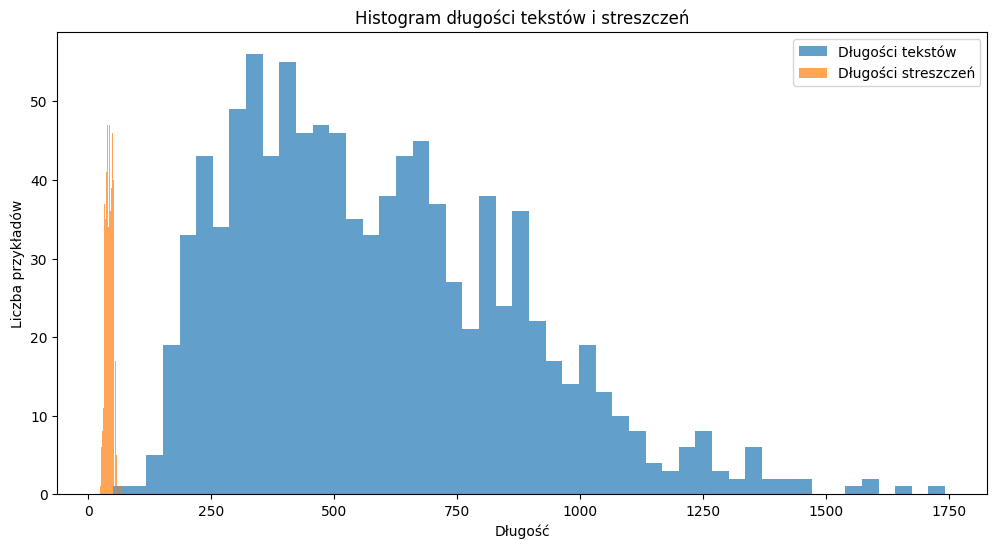

In [17]:
import matplotlib.pyplot as plt

# Histogramy
plt.figure(figsize=(12, 6))
plt.hist(text_len, bins=50, alpha=0.7, label="Długości tekstów")
plt.hist(summary_len, bins=50, alpha=0.7, label="Długości streszczeń")
plt.legend()
plt.title("Histogram długości tekstów i streszczeń")
plt.xlabel("Długość")
plt.ylabel("Liczba przykładów")
plt.show()


In [18]:
# Najdłuższy i najkrótszy artykuł
longest_article = max(df_train["article"], key=lambda x: words_count(x))
shortest_article = min(df_train["article"], key=lambda x: words_count(x))

print(f"Najdłuższy artykuł (liczba słów: {words_count(longest_article)}):\n{longest_article[:500]}...\n")
print(f"Najkrótszy artykuł (liczba słów: {words_count(shortest_article)}):\n{shortest_article[:500]}\n")

# Najdłuższe i najkrótsze streszczenie
longest_summary = max(df_train["highlights"], key=lambda x: words_count(x))
shortest_summary = min(df_train["highlights"], key=lambda x: words_count(x))

print(f"Najdłuższe streszczenie (liczba słów: {words_count(longest_summary)}):\n{longest_summary[:500]}...\n")
print(f"Najkrótsze streszczenie (liczba słów: {words_count(shortest_summary)}):\n{shortest_summary[:500]}\n")

Najdłuższy artykuł (liczba słów: 1743):
(CNN) -- CNN.com reader Kristy O'Connor took a prenatal yoga class with Heath Ledger and Michelle Williams and says she was "in awe of his devotion and attention to Michelle." Reader Dena Michnowih says she came across Ledger in Brooklyn, New York, teaching his young daughter Matilda her right from her left, and was enchanted. Heath Ledger is pictured with crew of the 2005 film "Lords of Dogtown" and members of the Zephyr skating team. CNN.com asked readers to share their memories of Ledger, who...

Najkrótszy artykuł (liczba słów: 50):
• The twins get a check-up (2/26/08) • VIDEO: Nancy Grace introduces on set 2-14-08  • The twins go out for a stroll (2/11/08) • The twins at 3 months (2/4/08) • The twins in January (1/21/08) • VIDEO: First video of Nancy Grace's twins  E-mail to a friend .

Najdłuższe streszczenie (liczba słów: 66):
Three-time defending champion Rafael Nadal into last 16 of the French Open .
Spanish world No. 2 crushes Finnish 2

In [19]:
from collections import Counter

# Tokenizacja i liczenie słów
df_train['article_word_count'] = df_train['article'].apply(lambda x: words_count(x))
df_train['summary_word_count'] = df_train['highlights'].apply(lambda x: words_count(x))

# Najczęściej występujące słowa w streszczeniach
all_summaries = " ".join(df_train['highlights'])
word_counts = Counter(all_summaries.split())
print(word_counts.most_common(10))


[('.', 3343), ('to', 1065), ('in', 1027), ('of', 927), ('the', 779), ('a', 470), ('says', 444), ('and', 429), ('for', 380), ('on', 337)]


## Inżynieria cech

In [20]:
import re

def clean_text(text):
  text = re.sub(r'http[s]?://\S+', '', text)
  text = text.strip().replace('\n', ' ').replace('\r', ' ')
  text = re.sub(r'\s+', ' ', text)
  return text

train_data = ds['train']
train_data = train_data_map = train_data.map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})
val_data = ds['validation'].map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})
test_data = ds['test'].map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})

train_data[:2], val_data[:2], test_data[:2]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

({'article': ['LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office ch

In [21]:
! pip install transformers torch

In [22]:
from transformers import AutoTokenizer

model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_data(examples):
    inputs = [f"summarize: {article}" for article in examples['article']]
    targets = examples['highlights']

    model_inputs = tokenizer(
        inputs,
        max_length=512,
        truncation=True,
        padding="max_length"
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=150,
            truncation=True,
            padding="max_length"
        )

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_data_tokenized = train_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=1000
)

val_data_tokenized = val_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=1000
)

test_data_tokenized = test_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=1000
)

train_data_tokenized = train_data_tokenized.with_format("torch")
val_data_tokenized = val_data_tokenized.with_format("torch")
test_data_tokenized = test_data_tokenized.with_format("torch")

print(train_data_tokenized[0])

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

C:\Users\maria\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\maria\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

C:\Users\maria\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:3961: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

{'id': '42c027e4ff9730fbb3de84c1af0d2c506e41c3e4', 'input_ids': tensor([21603,    10,   301, 24796,  4170,     6,  2789,    41, 18844,    61,
         1636,  8929, 16023,  2213,  4173,  6324, 12591,    15, 11391,   592,
           12,     3,     9,  2196,  3996,  1755,   770,  8785,   591, 11039,
          770,    61, 13462,    38,     3,    88,  5050,   507,    30,  2089,
            6,    68,     3,    88, 10419,     7,     8,   540,   751,    31,
           17,  4061,     3,     9, 10783,    30,   376,     5,  4173,  6324,
        12591,    15,    38,  8929, 16023,    16,    96, 15537,   651, 16023,
           11,     8,  5197,    13,     8, 12308,   121,   304,     8, 19142,
           13, 29517,  6710,   343,     7,   300,     8,   296,     6,     8,
         1021,  7556,   845,     3,    88,    65,   150,  1390,    12,  9030,
           17,   449,   112,  1723,   550,    30,  1006,  2948,     6,  3281,
           11, 17086,  2251,     5,    96,   196,   278,    31,    17,   515,


## Model

In [23]:
! pip install -U accelerate

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\accelerate.exe' -> 'C:\\Python311\\Scripts\\accelerate.exe.deleteme'



In [39]:
pip install --user 'accelerate>=0.26.0'



SyntaxError: invalid syntax (1250585667.py, line 1)

In [27]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=0.1,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=500,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data_tokenized,
    eval_dataset=val_data_tokenized,
    tokenizer=tokenizer,
)

trainer.train()

C:\Users\maria\AppData\Roaming\Python\Python311\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

In [ ]:
results = trainer.evaluate(eval_dataset=val_data_tokenized)
print(results)

In [ ]:
test_results = trainer.evaluate(eval_dataset=test_data_tokenized)
print(test_results)

In [ ]:
# Generating predictions for the test dataset
test_sample = test_data_tokenized[0]
input_ids = test_sample['input_ids']
outputs = model.generate(input_ids=input_ids.unsqueeze(0), max_length=150)

# Decode predictions
decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(decoded_output)

In [ ]:
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")

In [ ]:
pip install --user transformers datasets dash plotly jupyter-dash rouge-score torch


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from rouge_score import rouge_scorer
import torch

# Wczytanie modelu i tokenizatora
model = AutoModelForSeq2SeqLM.from_pretrained("./fine_tuned_model")
tokenizer = AutoTokenizer.from_pretrained("./fine_tuned_model")

# Załadowanie danych testowych
ds = load_dataset("abisee/cnn_dailymail", "3.0.0")
df_test = ds['test'].to_pandas()

# Funkcja do streszczania tekstów
def summarize(text):
    inputs = tokenizer(f"summarize: {text}", return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(input_ids=inputs['input_ids'], max_length=150)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Funkcja do ewaluacji modelu na danych testowych
def evaluate_model():
    predictions = []
    references = df_test["highlights"].tolist()
    
    for article in df_test["article"]:
        summary = summarize(article)
        predictions.append(summary)
    
    return predictions, references

# Obliczanie metryk ROUGE
def compute_rouge(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    for ref, pred in zip(references, predictions):
        scores = scorer.score(ref, pred)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    return rouge1_scores, rouge2_scores, rougeL_scores

# b. Tworzenie interaktywnej tablicy w Plotly Dash
app = dash.Dash(__name__)

# Layout tablicy
app.layout = html.Div([
    html.H1("Summarization Model Dashboard"),

    # Wybór trybu testowania
    dcc.RadioItems(
        id="test_mode",
        options=[
            {'label': 'Test Dataset Sample', 'value': 'sample'},
            {'label': 'Custom Input', 'value': 'custom'}
        ],
        value='sample',
        labelStyle={'display': 'block'}
    ),

    # Pole do wprowadzania tekstu (dla trybu "Custom Input")
    dcc.Textarea(
        id="input_text",
        style={'width': '100%', 'height': 100},
        placeholder="Enter text for summarization"
    ),

    # Suwak do wyboru próbki z danych testowych
    dcc.Slider(
        id='sample_id',
        min=0,
        max=len(df_test)-1,
        step=1,
        value=0,
        marks={i: f'Sample {i}' for i in range(0, len(df_test), 100)}
    ),

    html.Button('Generate Summary', id='generate_button', n_clicks=0),
    html.H3("Generated Summary"),
    html.Div(id='output_summary'),

    # Wizualizacja wyników - metryki ewaluacji
    html.H3("Evaluation Metrics"),
    html.Button('Compute Evaluation', id='compute_metrics_button', n_clicks=0),
    html.Div(id='rouge_scores'),

    # Analiza błędów
    html.H3("Error Analysis"),
    html.Div(id='error_analysis')
])

# Callback do generowania streszczeń
@app.callback(
    Output('output_summary', 'children'),
    Input('generate_button', 'n_clicks'),
    [Input('test_mode', 'value'), Input('input_text', 'value'), Input('sample_id', 'value')]
)
def generate_summary(n_clicks, test_mode, input_text, sample_id):
    if test_mode == 'sample':
        input_text = df_test.iloc[sample_id]["article"]
    if input_text:
        summary = summarize(input_text)
        return summary
    return "No input provided."

# Callback do obliczania metryk ROUGE
@app.callback(
    Output('rouge_scores', 'children'),
    Input('compute_metrics_button', 'n_clicks')
)
def compute_metrics(n_clicks):
    if n_clicks > 0:
        predictions, references = evaluate_model()
        rouge1_scores, rouge2_scores, rougeL_scores = compute_rouge(predictions, references)
        rouge1_avg = sum(rouge1_scores) / len(rouge1_scores)
        rouge2_avg = sum(rouge2_scores) / len(rouge2_scores)
        rougeL_avg = sum(rougeL_scores) / len(rougeL_scores)
        return f"ROUGE-1: {rouge1_avg:.4f}, ROUGE-2: {rouge2_avg:.4f}, ROUGE-L: {rougeL_avg:.4f}"
    return "Click to compute evaluation."

# Callback do analizy błędów (pierwsze 5 przykładów)
@app.callback(
    Output('error_analysis', 'children'),
    Input('compute_metrics_button', 'n_clicks')
)
def error_analysis(n_clicks):
    if n_clicks > 0:
        mismatches = []
        for i, article in enumerate(df_test["article"]):
            generated_summary = summarize(article)
            actual_summary = df_test.iloc[i]["highlights"]
            if generated_summary != actual_summary:
                mismatches.append((article, generated_summary, actual_summary))
        return [
            html.Div([
                html.H4(f"Mismatch {i+1}"),
                html.P(f"Original Article: {mismatch[0][:300]}..."),
                html.P(f"Generated Summary: {mismatch[1]}"),
                html.P(f"Actual Summary: {mismatch[2]}")
            ]) for i, mismatch in enumerate(mismatches[:5])
        ]
    return "Click to compute evaluation and view errors."

# Uruchomienie aplikacji Dash w notebooku
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)
app.run_server(mode='inline')


OSError: Incorrect path_or_model_id: './fine_tuned_model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [6]:
import torch
print(torch.__version__)


2.5.1+cpu
